<a href="https://colab.research.google.com/github/91htjung/AirportBusinessAnalytics/blob/main/Forecast_Shortterm_Ststistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import warnings

try:
    import sktime
    import seaborn as sns
except:
    %pip install sktime
    %pip install pmdarima
    %pip install seaborn
    %pip install prophet
    import sktime
    import seaborn as sns

sns.set(rc={'figure.figsize':(12,6)})
warnings.filterwarnings("ignore")

In [70]:
dataset = pd.read_csv('https://raw.githubusercontent.com/91htjung/AirportBusinessAnalytics/main/Data_Shortterm_Statistics.csv')
dataset['Period'] = pd.to_datetime(dataset['Period'])
dataset = dataset.set_index(['Period']).to_period("M")
dataset.head()

,Airport A,Airport B
Period,,
2010-01,1297508,1453070
2010-02,1209205,1319609
2010-03,1469505,1433403
2010-04,1378510,1364560
2010-05,1701556,1353164


<Axes: xlabel='Period'>

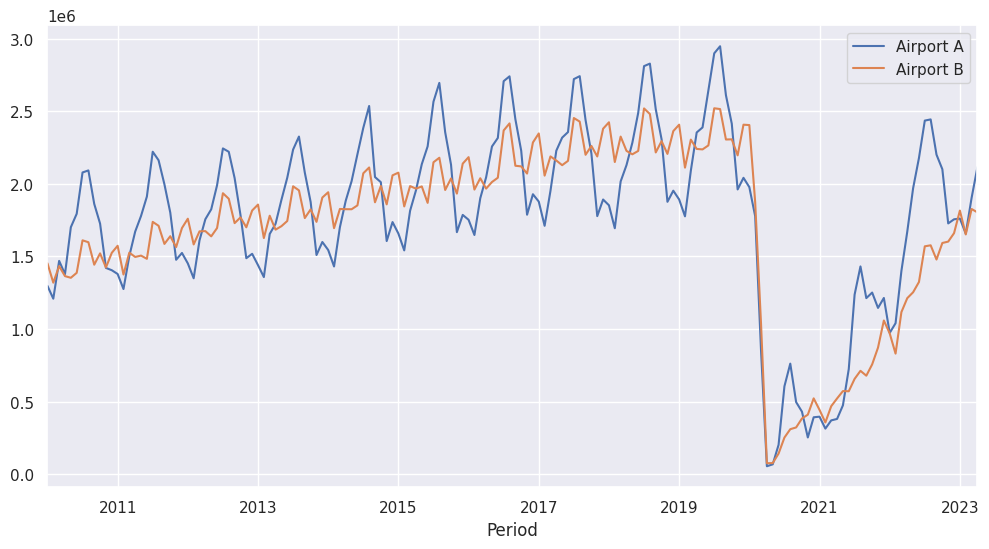

In [71]:
dataset.plot(kind='line')

In [75]:
before_covid = dataset[(dataset.index <= pd.Period('2019-12-01', freq='M'))]
after_covid = dataset[(dataset.index > pd.Period('2019-12-01', freq='M'))]

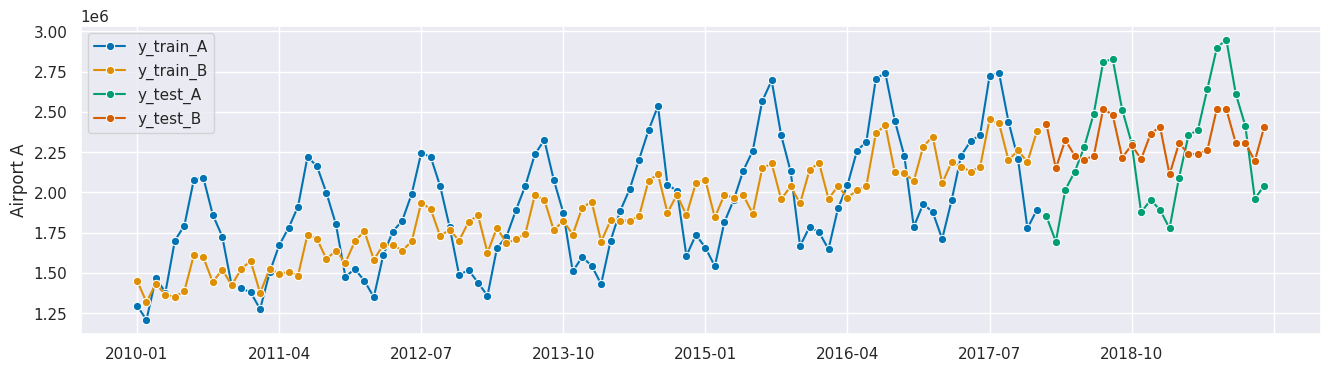

In [78]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(before_covid, test_size=24)

from sktime.utils.plotting import plot_series
plot_series(y_train['Airport A'], y_train['Airport B'], y_test['Airport A'], y_test['Airport B'], labels=['y_train_A', 'y_train_B', 'y_test_A', 'y_test_B']);

In [79]:
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(y_test.index, is_relative=False)
print(f"Absolute FH: {fh}")

Absolute FH: ForecastingHorizon(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', is_relative=False)


In [107]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

exp_forecaster = ExponentialSmoothing(seasonal='multiplicative', sp=12).fit(y_train)
y_pred_exp = exp_forecaster.predict(fh=fh)
y_pred_exp.head()

,Airport A,Airport B
2018-01,1.799187e+06,2.402077e+06
2018-02,1.655461e+06,2.110700e+06
2018-03,1.937020e+06,2.259611e+06
2018-04,2.106800e+06,2.211409e+06
2018-05,2.258850e+06,2.203870e+06


In [144]:
from sktime.forecasting.arima import ARIMA

arima_forecaster = ARIMA(order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)).fit(y_train)
y_pred_arima = arima_forecaster.predict(fh=fh)
y_pred_arima.head()

,Airport A,Airport B
2018-01,1.953365e+06,2.468195e+06
2018-02,1.792356e+06,2.179544e+06
2018-03,2.033917e+06,2.307709e+06
2018-04,2.309925e+06,2.279546e+06
2018-05,2.400368e+06,2.248131e+06


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Airport A'>)

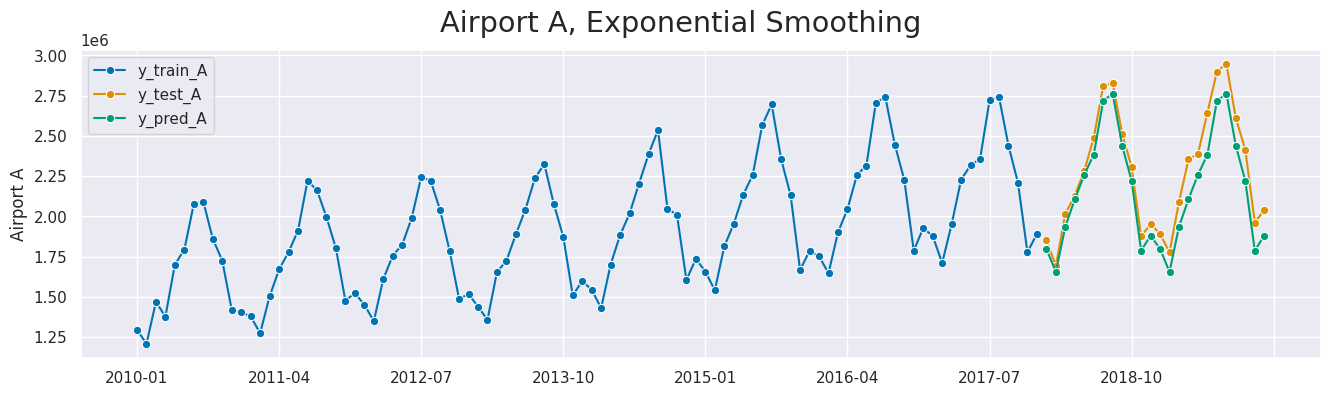

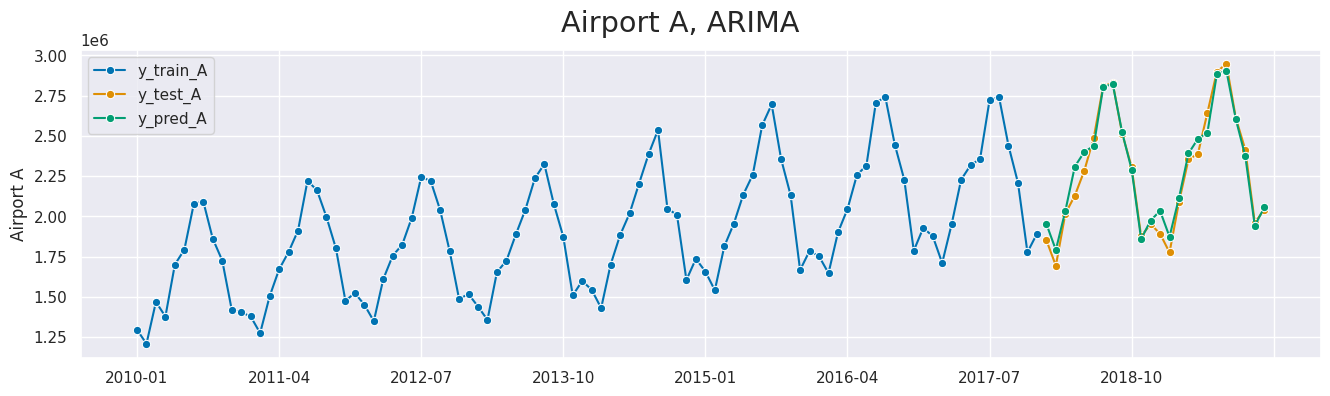

In [153]:
plot_series(y_train['Airport A'], y_test['Airport A'], y_pred_exp['Airport A'],
            labels=['y_train_A', 'y_test_A', 'y_pred_A'], title='Airport A, Exponential Smoothing')

plot_series(y_train['Airport A'], y_test['Airport A'], y_pred_arima['Airport A'],
            labels=['y_train_A', 'y_test_A', 'y_pred_A'], title='Airport A, ARIMA')

In [170]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

mape = MeanAbsolutePercentageError(symmetric=False)
print('MAPE of Airport A')
print('Exponential Smoothing: ', mape(y_test['Airport A'], y_pred_exp['Airport A']))
print('ARIMA: ', mape(y_test['Airport A'], y_pred_arima['Airport A']))

print('Forcast using ARIMA had lower MAPE for Airport A')

MAPE of Airport A
Exponential Smoothing:  0.0521046535164881
ARIMA:  0.025428382266825336
Forcast using ARIMA had lower MAPE for Airport A


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Airport B'>)

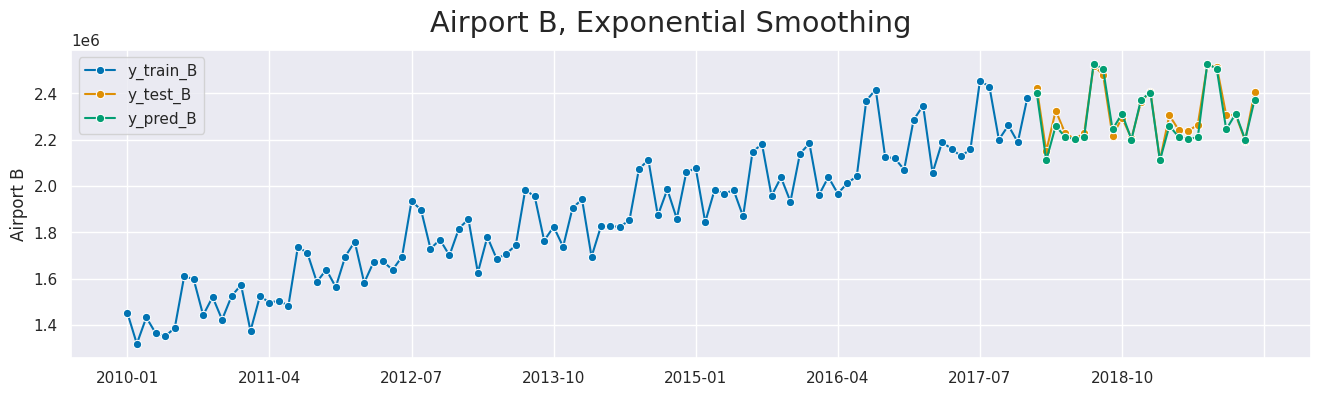

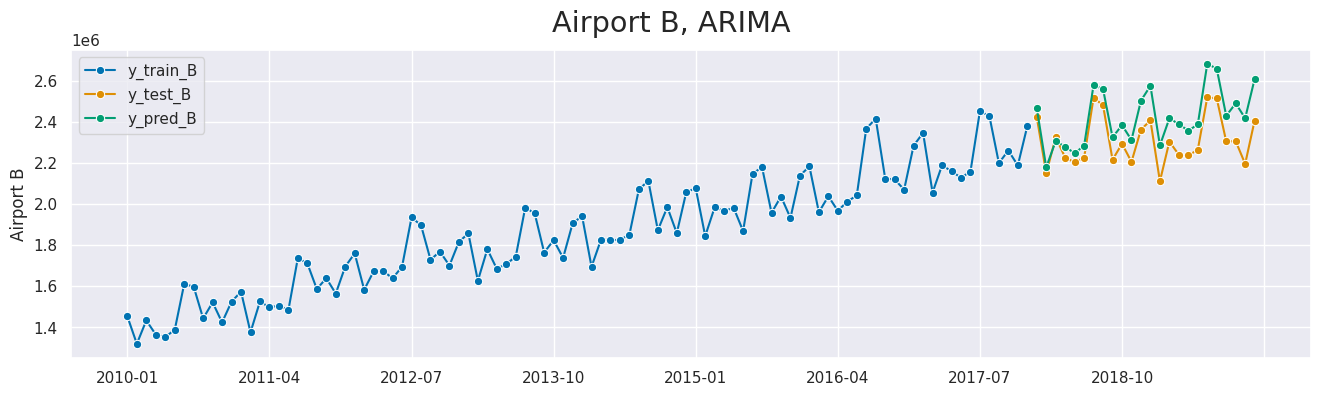

In [161]:
plot_series(y_train['Airport B'], y_test['Airport B'], y_pred_exp['Airport B'],
            labels=['y_train_B', 'y_test_B', 'y_pred_B'], title='Airport B, Exponential Smoothing')

plot_series(y_train['Airport B'], y_test['Airport B'], y_pred_arima['Airport B'],
            labels=['y_train_B', 'y_test_B', 'y_pred_B'], title='Airport B, ARIMA')

In [160]:
print('MAPE of Airport B')
print('Exponential Smoothing: ', mape(y_test['Airport B'], y_pred_exp['Airport B']))
print('ARIMA: ', mape(y_test['Airport B'], y_pred_arima['Airport B']))

print('Forcast using Exponential Smoothing had lower MAPE for Airport B')

MAPE of Airport B
Exponential Smoothing:  0.0098880449914101
ARIMA:  0.049187416284014386
Forcast using Exponential Smoothing had lower MAPE for Airport B
